In [31]:
import pandas as pd
import numpy as np 

In [299]:
df = pd.read_csv('Data.csv')
df.head()
df.info()
category_list = df['category'].unique()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [302]:
from sklearn.preprocessing import LabelEncoder
ce = LabelEncoder() 
df['category'] = ce.fit_transform(df['category'])

In [305]:
df2 =df.loc[0:49999, df.columns.drop(['step','customer','gender','zipMerchant','merchant','zipcodeOri'])]
for i in range(len(df2['age'])):
    if df['age'][i] == "'U'":
        df2 = df2.drop(labels=i, axis=0)
        
df2.dtypes

"'U'"

In [312]:
import re

In [313]:
df2['age'] = df2['age'].str.replace('[^0-9]', '', regex=True).astype(int)

#df2['merchant'] = df2['merchant'].str.sub('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = df2['merchant'].replace('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = re.sub("M", "0",df['merchant'].to_list()).astype('int64')

In [315]:
# df2['age'] = df2['age'].str.replace('[^0-9]', '', regex=True)

#df2['merchant'] = df2['merchant'].str.sub('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = df2['merchant'].replace('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = re.sub("M", "0",df['merchant'].to_list()).astype('int64')

In [316]:
df2['age']= df2['age'].astype('int')

In [317]:
df2.describe()

,age,category,amount,fraud
count,49926.000000,49926.000000,49926.000000,49926.000000
mean,3.001682,11.134759,39.904945,0.015503
std,1.330011,2.755710,130.796801,0.123543
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,12.000000,13.802500,0.000000
50%,3.000000,12.000000,26.980000,0.000000
75%,4.000000,12.000000,42.880000,0.000000
max,6.000000,14.000000,7432.480000,1.000000


In [319]:
from keras import Sequential, Model, Input,regularizers
from keras import layers
from keras.regularizers import l2
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [320]:
X = df2.drop(['fraud'],axis=1).values
Y = df2[['fraud']].values

df2.dtypes

In [323]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=4)

In [328]:
model=Sequential()
model.add(Dense(3,activation="relu",input_shape=(3,)))
model.add(Dense(units=2,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 2)                 8         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [329]:
model.compile(optimizer = 'Adam', loss="binary_crossentropy",metrics=["accuracy"])

In [330]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
40/40 [==============================] - 1s 5ms/step - loss: 0.6660 - accuracy: 0.9832 - val_loss: 0.6501 - val_accuracy: 0.9813
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.9841 - val_loss: 0.6177 - val_accuracy: 0.9820
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.9847 - val_loss: 0.5798 - val_accuracy: 0.9824
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.4489 - accuracy: 0.9850 - val_loss: 0.3054 - val_accuracy: 0.9824
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.2271 - accuracy: 0.9850 - val_loss: 0.1744 - val_accuracy: 0.9824
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9850 - val_loss: 0.1226 - val_accuracy: 0.9824
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9850 - val_loss: 0.0987 - val_accuracy: 0.9824
Epoch 8/50
40/40 [==

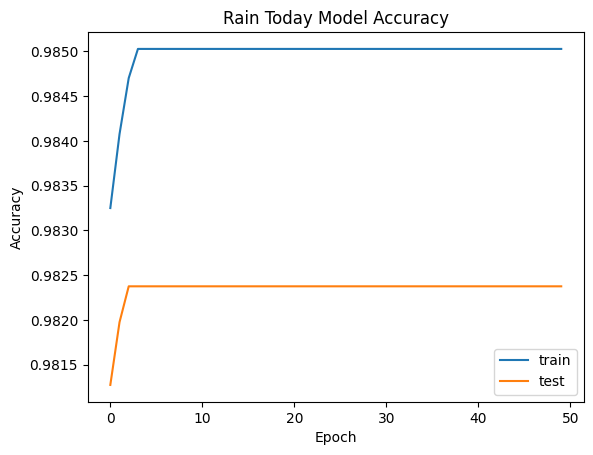

In [331]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title('Rain Today Model Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['train','test'],loc='lower right')
pyplot.show()

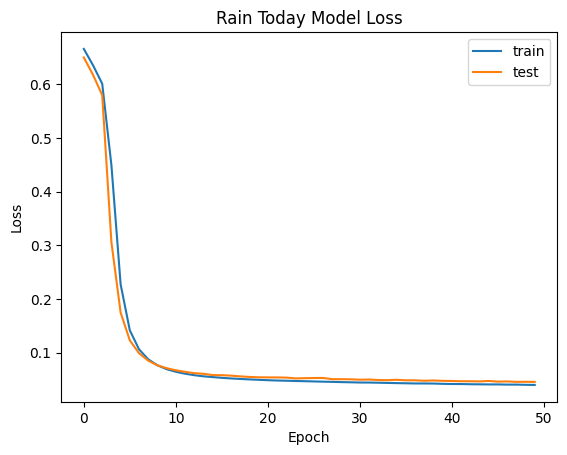

In [332]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('Rain Today Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()